# California House Price Prediction (Regression)

Kaliforniya'daki evlerin fiyatlarını coğrafi, demografik ve konut özelliklerinden tahmin eden regression modeli geliştirmek.

<font color = 'red'>
    
Proje İçeriği:

- [Detaylı EDA](#1)
  

  [Veri Keşfi](#2)
  
  [Statistical Analysis](#3)
  
  [Correlation Analysis](#4)
  
- [Feature Engineering](#5)
 
  [Geographic Features](#6)

  [Derived Features](#7)
 
  [Data Preprocessing](#8)
 
- [Model Development](#9)
  
  [Algoritma Seçimi](#10)
 
  [Validation Strategy](#11)
 
  [Advanced Techniques](#12)

- [Model Evaluation](#13)
  
  [Regression Metrics](#14)
    

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id = "1"></a><br>
## Detaylı EDA

<a id = "2"></a><br>
## Veri Keşfi
- Dataset description ve feature açıklamalarını okuma 
- Hedef değişkenin dağılımını inceleme (normal dağılım var mı?)
- Feature'ların veri tiplerini ve  range'lerini kontrol etme
- Coğrafi veriler için latitude/longitude dağılımını mapping


In [31]:
data2 = pd.read_csv("/Users/nilsuaksu/california_housing.csv")

In [33]:
data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [35]:
# Dataset description ve feature açıklamalarını okuma
print(" DATASET DESCRIPTION")
print("\n")
print(f"Veri boyutu: {data2.shape}")
print(f"Satır sayısı: {data2.shape[0]}")
print(f"Sütun sayısı: {data2.shape[1]}")

print("\nFeature açıklamaları:")
print("longitude: Boylam")
print("latitude: Enlem") 
print("housing_median_age: Ev yaşı")
print("total_rooms: Toplam oda sayısı")
print("total_bedrooms: Yatak odası sayısı")
print("population: Nüfus")
print("households: Hane sayısı")
print("median_income: Gelir")
print("median_house_value: Ev değeri (hedef)")
print("ocean_proximity: Okyanusa yakınlık")

 DATASET DESCRIPTION


Veri boyutu: (20640, 10)
Satır sayısı: 20640
Sütun sayısı: 10

Feature açıklamaları:
longitude: Boylam
latitude: Enlem
housing_median_age: Ev yaşı
total_rooms: Toplam oda sayısı
total_bedrooms: Yatak odası sayısı
population: Nüfus
households: Hane sayısı
median_income: Gelir
median_house_value: Ev değeri (hedef)
ocean_proximity: Okyanusa yakınlık


In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



 HEDEF DEĞİŞKEN DAĞILIMI
Ortalama: 206856
Medyan: 179700
Çarpıklık: 0.98


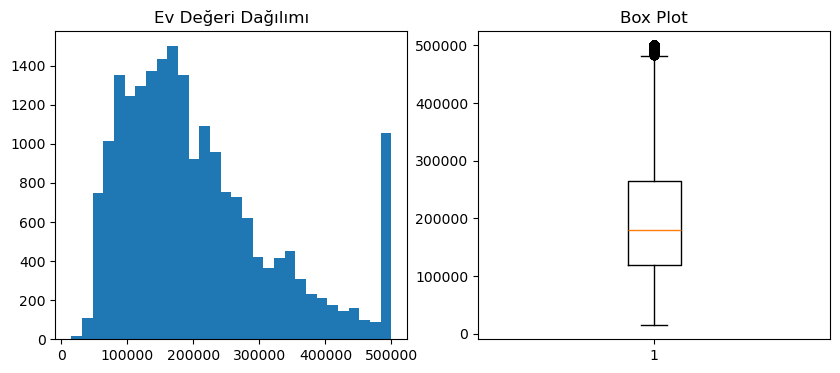

In [39]:
# Hedef değişkenin dağılımını inceleme (normal dağılım var mı?)
target = data2['median_house_value']
print(f"\n HEDEF DEĞİŞKEN DAĞILIMI")
print(f"Ortalama: {target.mean():.0f}")
print(f"Medyan: {target.median():.0f}")
print(f"Çarpıklık: {target.skew():.2f}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(target, bins=30)
plt.title('Ev Değeri Dağılımı')

plt.subplot(1, 2, 2)
plt.boxplot(target)
plt.title('Box Plot')
plt.show()



In [41]:
# Feature'ların veri tiplerini ve range'lerini kontrol etme
print(f"\n VERİ TİPLERİ VE RANGE'LER")
print("Veri tipleri:")
print(data2.dtypes)

print("\nRange'ler (min-max):")
for col in data2.select_dtypes(include=[np.number]).columns:
    print(f"{col}: {data2[col].min():.1f} - {data2[col].max():.1f}")

print("\nEksik değerler:")
print(data2.isnull().sum())


 VERİ TİPLERİ VE RANGE'LER
Veri tipleri:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Range'ler (min-max):
longitude: -124.3 - -114.3
latitude: 32.5 - 42.0
housing_median_age: 1.0 - 52.0
total_rooms: 2.0 - 39320.0
total_bedrooms: 1.0 - 6445.0
population: 3.0 - 35682.0
households: 1.0 - 6082.0
median_income: 0.5 - 15.0
median_house_value: 14999.0 - 500001.0

Eksik değerler:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


COGRAFİK VERİ MAPPING
Latitude aralığı: 32.54 - 41.95
Longitude aralığı: -124.35 - -114.31


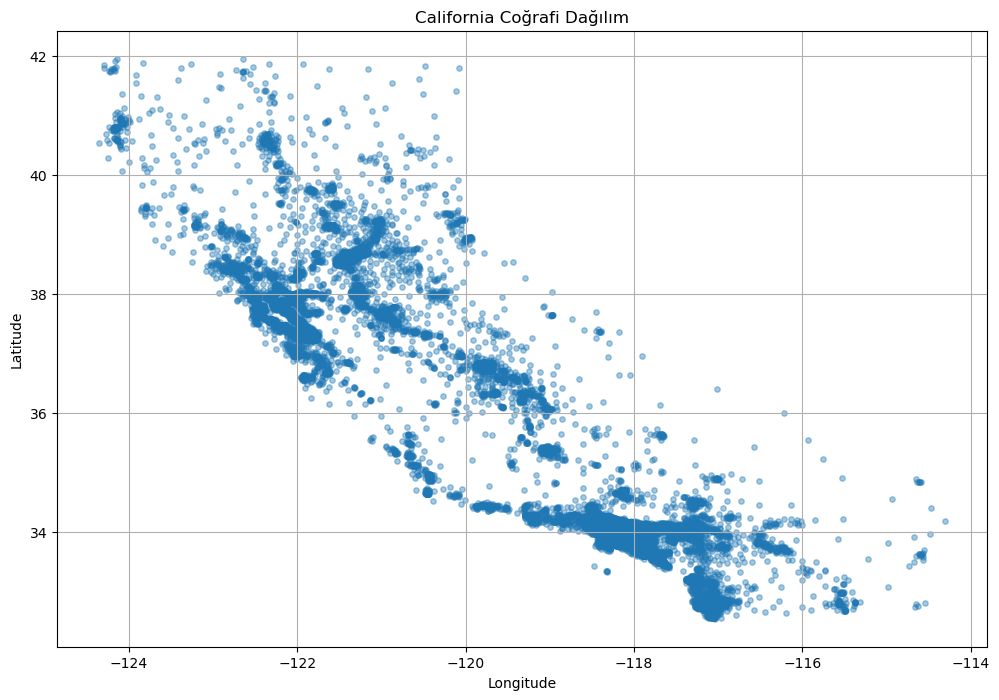

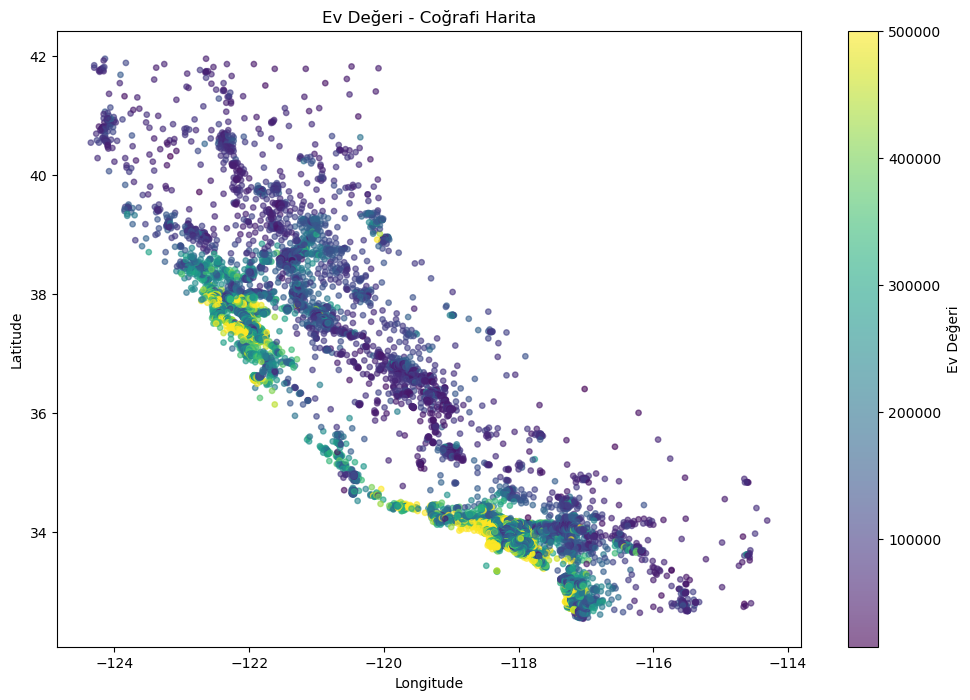

In [43]:
# Coğrafi veriler için latitude/longitude dağılımını mapping

"""Latitude (Enlem): Kuzey-güney konumu (32.5° - 41.9° arası)
Longitude (Boylam): Doğu-batı konumu (-124.3° - -114.3° arası)

İlk harita: Sadece noktaları gösteriyor (evlerin konumları)
İkinci harita: Renk kodlu - pahalı evler farklı renkte görünecek

"""

print(f"COGRAFİK VERİ MAPPING")
print(f"Latitude aralığı: {data2['latitude'].min():.2f} - {data2['latitude'].max():.2f}")
print(f"Longitude aralığı: {data2['longitude'].min():.2f} - {data2['longitude'].max():.2f}")

plt.figure(figsize=(12, 8))
plt.scatter(data2['longitude'], data2['latitude'], alpha=0.4, s=15)
plt.title('California Coğrafi Dağılım')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Ev değeri ile coğrafi konum
plt.figure(figsize=(12, 8))
plt.scatter(data2['longitude'], data2['latitude'], 
           c=data2['median_house_value'], cmap='viridis', alpha=0.6, s=15)
plt.colorbar(label='Ev Değeri')
plt.title('Ev Değeri - Coğrafi Harita')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<a id = "3"></a><br>
## Statistical Analysis
- Descriptive statistics (mean, median, std, percentiles)
- Skewness ve kurtosis analizi
- Distribution plots (histogram, kde, qq-plot)
- Outlier detection (Z-score, IQR methods)
- Geographic visualization (scatter plot lat/long colored by price)

In [48]:
#Descriptive statistics (mean, median, std, percentiles)
print("\nDESCRIPTIVE STATISTICS")
print("\n")
data2.describe()


DESCRIPTIVE STATISTICS




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [356]:
print("\nHedef değişken detayları:")
target = data2['median_house_value']
print(f"Mean: {target.mean():.0f}")
print(f"Median: {target.median():.0f}")
print(f"Std: {target.std():.0f}")
print(f"25th percentile: {target.quantile(0.25):.0f}")
print(f"75th percentile: {target.quantile(0.75):.0f}")
print(f"IQR: {target.quantile(0.75) - target.quantile(0.25):.0f}")



Hedef değişken detayları:
Mean: 206856
Median: 179700
Std: 115396
25th percentile: 119600
75th percentile: 264725
IQR: 145125


In [357]:
# Kategorik ve numerik değişkenleri ayrı ayrı listeleme

# Kategorik değişkenler
categorical_cols = data2.select_dtypes(include=['object']).columns.tolist()


# Numerik değişkenler  
numerical_cols = data2.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Kategorik ({len(categorical_cols)}): {categorical_cols}")
print("-----")
print(f"Numerik ({len(numerical_cols)}): {numerical_cols}")

Kategorik (1): ['ocean_proximity']
-----
Numerik (9): ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [358]:
#Her değişkenin unique değer sayısını kontrol etme
for col in data2.columns:
    print(f"{col}: {data2[col].nunique()} unique değer")

longitude: 844 unique değer
latitude: 862 unique değer
housing_median_age: 52 unique değer
total_rooms: 5926 unique değer
total_bedrooms: 1923 unique değer
population: 3888 unique değer
households: 1815 unique değer
median_income: 12928 unique değer
median_house_value: 3842 unique değer
ocean_proximity: 5 unique değer


In [359]:
# Skewness ve kurtosis analizi
print(f" SKEWNESS VE KURTOSIS ANALİZİ")
print("Tüm sayısal değişkenler için:")
for col in data2.select_dtypes(include=[np.number]).columns:
    skew = data2[col].skew()
    kurt = data2[col].kurtosis()
    print(f"{col}: Skewness={skew:.3f}, Kurtosis={kurt:.3f}")

print("\nHedef değişken yorumu:")
target_skew = target.skew()
target_kurt = target.kurtosis()
if target_skew > 0.5:
    print(f"Skewness={target_skew:.3f} -> Sağa çarpık")
elif target_skew < -0.5:
    print(f"Skewness={target_skew:.3f} -> Sola çarpık")
else:
    print(f"Skewness={target_skew:.3f} -> Normal")

if target_kurt > 3:
    print(f"Kurtosis={target_kurt:.3f} -> Sivri dağılım")
elif target_kurt < 3:
    print(f"Kurtosis={target_kurt:.3f} -> Düz dağılım")
else:
    print(f"Kurtosis={target_kurt:.3f} -> Normal dağılım")

 SKEWNESS VE KURTOSIS ANALİZİ
Tüm sayısal değişkenler için:
longitude: Skewness=-0.298, Kurtosis=-1.330
latitude: Skewness=0.466, Kurtosis=-1.118
housing_median_age: Skewness=0.060, Kurtosis=-0.801
total_rooms: Skewness=4.147, Kurtosis=32.631
total_bedrooms: Skewness=3.460, Kurtosis=21.986
population: Skewness=4.936, Kurtosis=73.553
households: Skewness=3.410, Kurtosis=22.058
median_income: Skewness=1.647, Kurtosis=4.953
median_house_value: Skewness=0.978, Kurtosis=0.328

Hedef değişken yorumu:
Skewness=0.978 -> Sağa çarpık
Kurtosis=0.328 -> Düz dağılım


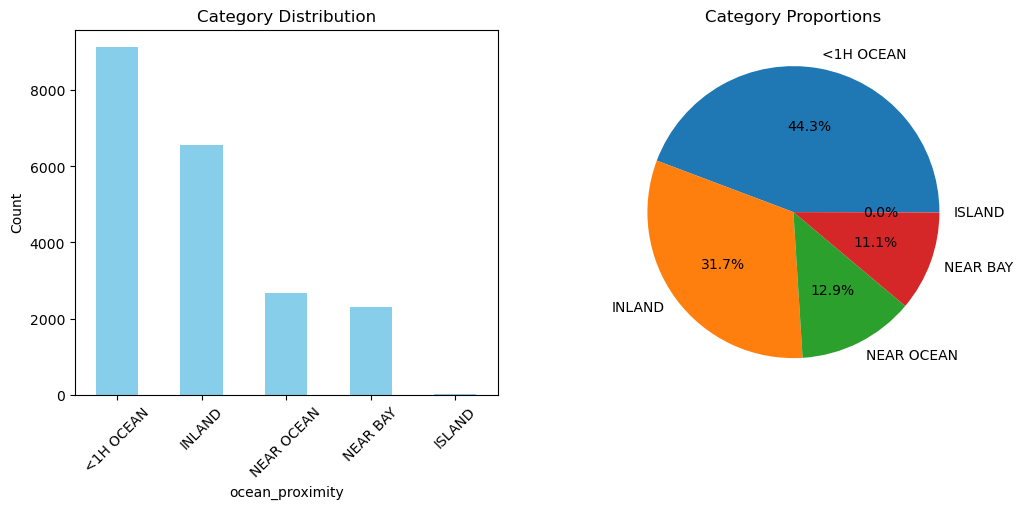

Kategori sayıları:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Kategori oranları:
ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: proportion, dtype: float64


In [360]:
# Kategorik veri için distribution plots
categorical_cols = data2.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
   cat_col = categorical_cols[0]
   
   fig, axes = plt.subplots(1, 2, figsize=(12, 5))
   # Bar plot - kategorilerin frekansı
   data2[cat_col].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
   axes[0].set_title('Category Distribution')
   axes[0].set_ylabel('Count')
   axes[0].tick_params(axis='x', rotation=45)
   # Pie chart - kategorilerin oranı
   data2[cat_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
   axes[1].set_title('Category Proportions')
   axes[1].set_ylabel('')
   plt.subplots_adjust(bottom=0.15)
   plt.show()
   # Temel istatistikler
   print("Kategori sayıları:")
   print(data2[cat_col].value_counts())
   print("\nKategori oranları:")
   print(data2[cat_col].value_counts(normalize=True))

Sayısal sütunlar: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


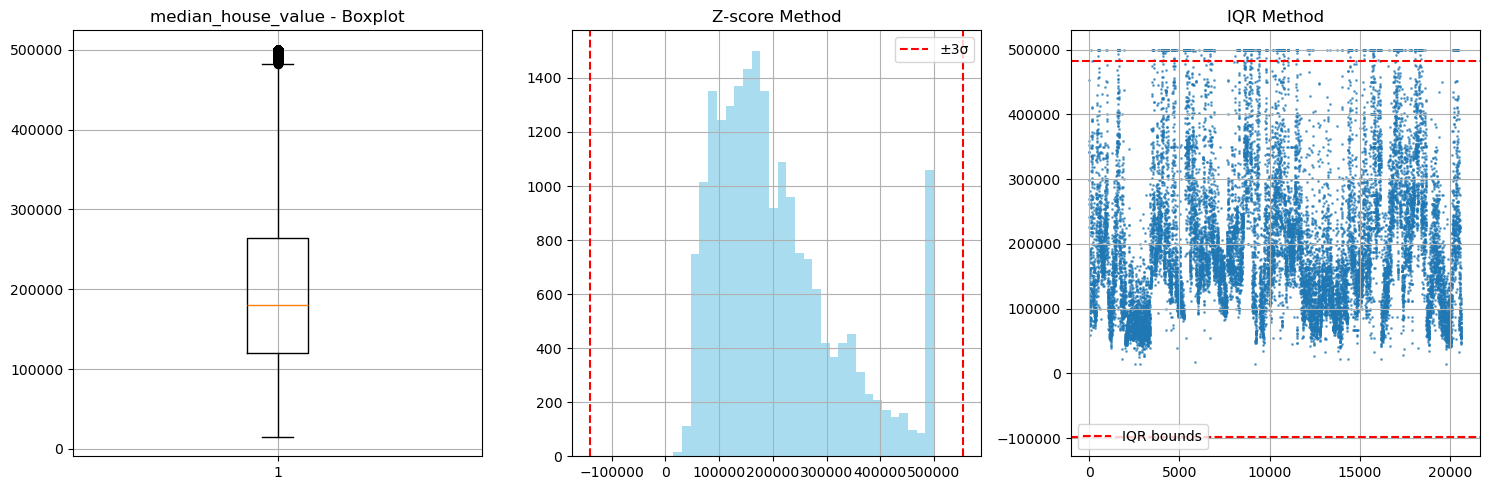

Z-score outliers: 0 (0.0%)
IQR outliers: 1071 (5.2%)


In [361]:
# Outlier detection (Z-score, IQR methods)
from scipy import stats

# Sayısal sütunları al
numeric_cols = data2.select_dtypes(include=[np.number]).columns
print(f"Sayısal sütunlar: {numeric_cols.tolist()}")

# Örnek olarak median_house_value için outlier detection
target_col = 'median_house_value'
data_values = data2[target_col].values

# Z-score method
z_scores = np.abs(stats.zscore(data_values))
z_outliers = data_values[z_scores > 3]

# IQR method
Q1 = np.percentile(data_values, 25)
Q3 = np.percentile(data_values, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = data_values[(data_values < lower_bound) | (data_values > upper_bound)]

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Boxplot
axes[0].boxplot(data_values)
axes[0].set_title(f'{target_col} - Boxplot')
axes[0].grid(True)
# Histogram with thresholds
axes[1].hist(data_values, bins=30, alpha=0.7, color='skyblue')
axes[1].axvline(np.mean(data_values) + 3*np.std(data_values), color='red', linestyle='--', label='±3σ')
axes[1].axvline(np.mean(data_values) - 3*np.std(data_values), color='red', linestyle='--')
axes[1].set_title('Z-score Method')
axes[1].legend()
axes[1].grid(True)
# Scatter with IQR bounds
axes[2].scatter(range(len(data_values)), data_values, alpha=0.6, s=1)
axes[2].axhline(upper_bound, color='red', linestyle='--', label='IQR bounds')
axes[2].axhline(lower_bound, color='red', linestyle='--')
axes[2].set_title('IQR Method')
axes[2].legend()
axes[2].grid(True)
plt.tight_layout()
plt.show()

print(f"Z-score outliers: {len(z_outliers)} ({len(z_outliers)/len(data_values)*100:.1f}%)")
print(f"IQR outliers: {len(iqr_outliers)} ({len(iqr_outliers)/len(data_values)*100:.1f}%)")

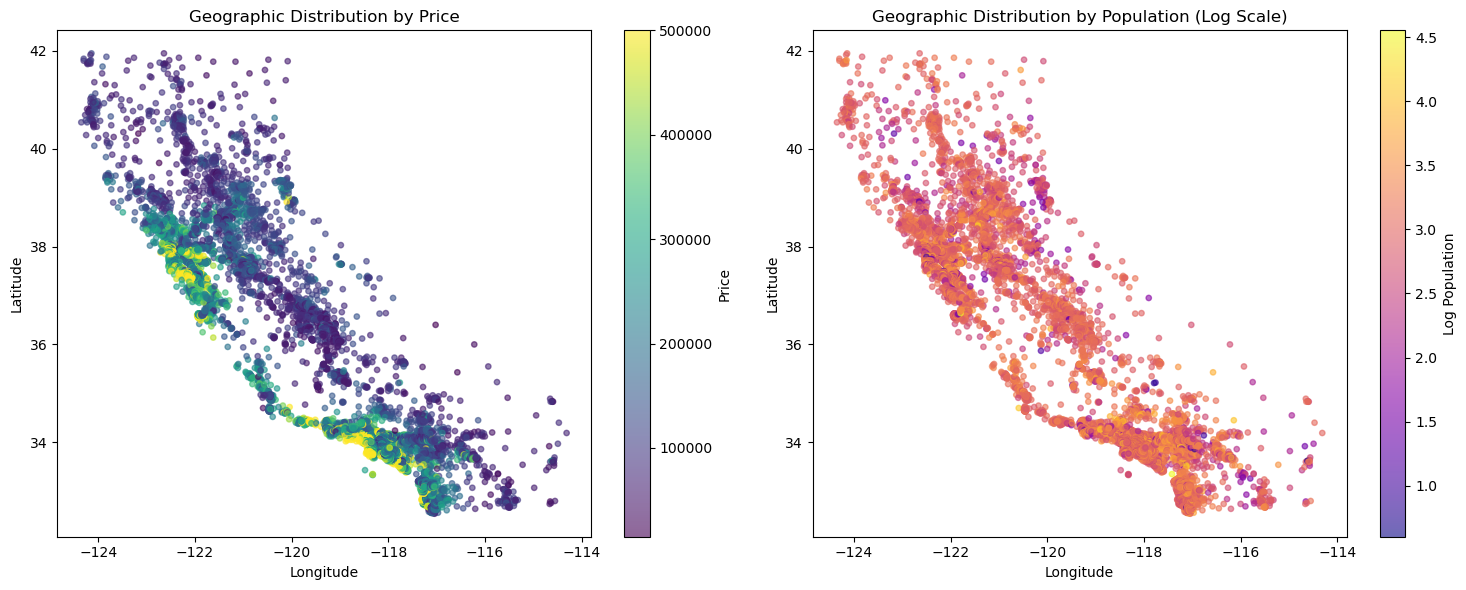

In [362]:
# Geographic visualization (scatter plot lat/long colored by price)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sol: Price ile renkli
scatter1 = axes[0].scatter(data2['longitude'], data2['latitude'], c=data2['median_house_value'], 
                         cmap='viridis', alpha=0.6, s=15)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Geographic Distribution by Price')
plt.colorbar(scatter1, ax=axes[0], label='Price')

# Sağ: Population ile renkli (log scale ile düzeltildi)
population_log = np.log10(data2['population'] + 1)  # +1 log(0) hatasını önler
scatter2 = axes[1].scatter(data2['longitude'], data2['latitude'], c=population_log, 
                         cmap='plasma', alpha=0.6, s=15)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Geographic Distribution by Population (Log Scale)')
plt.colorbar(scatter2, ax=axes[1], label='Log Population')

plt.tight_layout()
plt.show()

In [363]:
from sklearn.impute import SimpleImputer, KNNImputer

# Eksik değerleri kontrol et
print("Eksik değerler:")
print(data2.isnull().sum())

# Sayısal sütunları al
numeric_cols = data2.select_dtypes(include=[np.number]).columns

# KNN ile doldur 
knn_imputer = KNNImputer(n_neighbors=5)
data2[numeric_cols] = knn_imputer.fit_transform(data2[numeric_cols])

# Kontrol et
print("\nDoldurduktan sonra eksik değerler:")
print(data2.isnull().sum())

Eksik değerler:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Doldurduktan sonra eksik değerler:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


<a id = "4"></a><br>
## Correlation Analysis

- Pearson correlation matrix
- Spearman correlation (non-linear relationships için) 
- Partial correlation analysis
- VIF (Variance Inflation Factor) multicollinearity testi

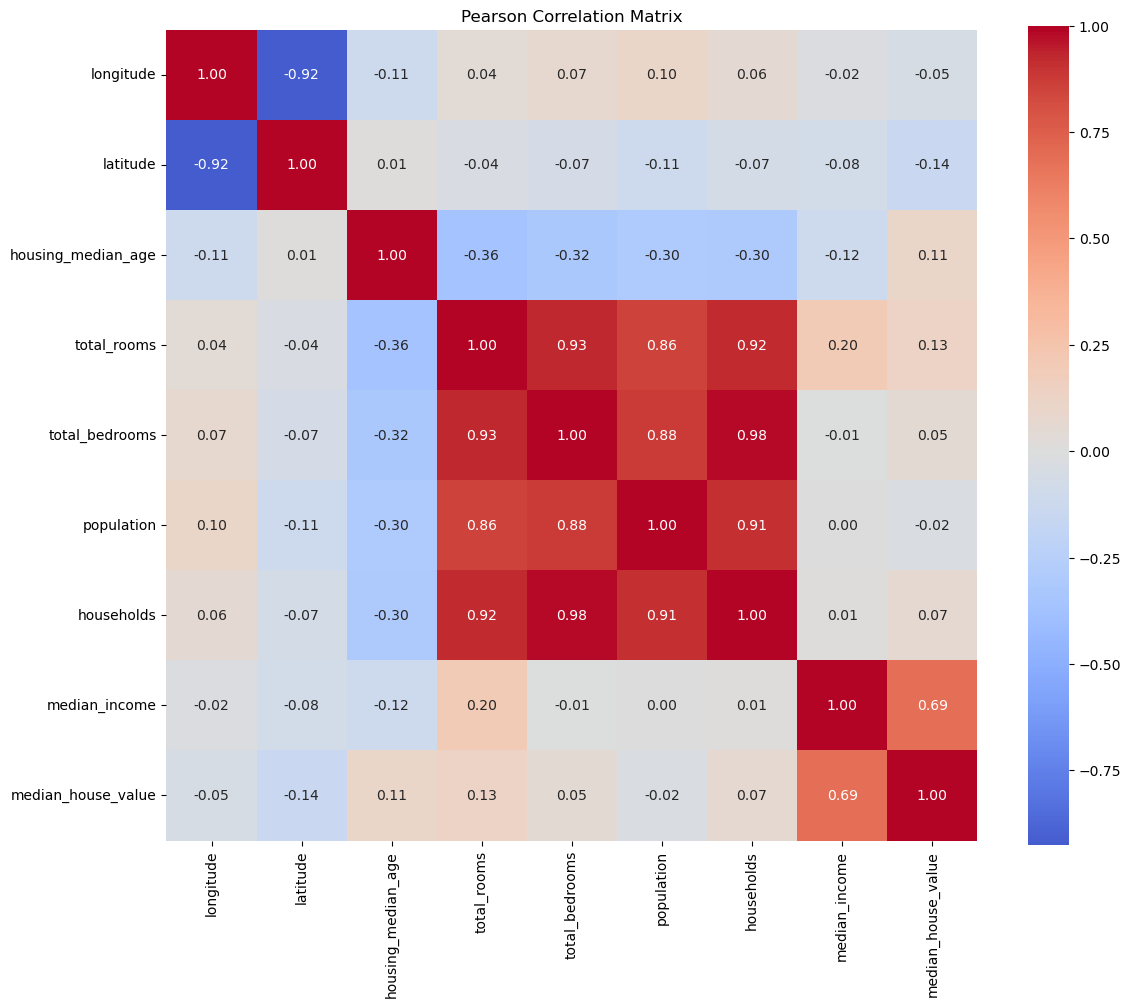

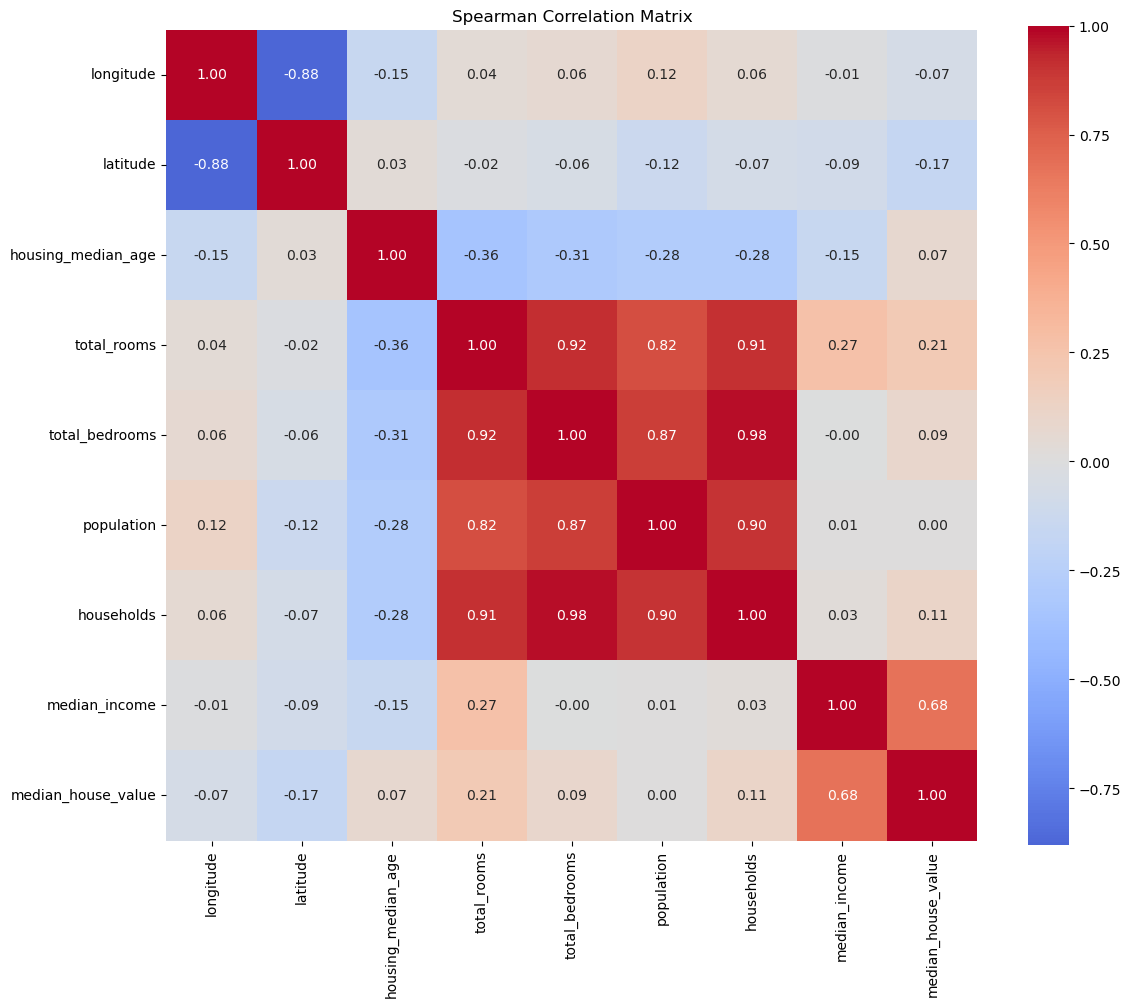

Partial correlation (median_house_value vs median_income, controlling population): 0.688


In [364]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import spearmanr, pearsonr

# Sadece sayısal sütunları al
numeric_data = data2.select_dtypes(include=[np.number])

# 1. Pearson correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

# 2. Spearman correlation
spearman_corr = numeric_data.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, 
           square=True, fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

# 3. Partial correlation analysis
def partial_corr(df, x, y, control):
   """Partial correlation hesaplama"""
   x_resid = x - np.polyval(np.polyfit(control, x, 1), control)
   y_resid = y - np.polyval(np.polyfit(control, y, 1), control)
   return pearsonr(x_resid, y_resid)[0]

# Örnek partial correlation
partial_corr_result = partial_corr(numeric_data, numeric_data['median_house_value'], 
                                  numeric_data['median_income'], numeric_data['population'])
print(f"Partial correlation (median_house_value vs median_income, controlling population): {partial_corr_result:.3f}")




<a id = "5"></a><br>
## Feature Engineering


<a id = "6"></a><br>
## Geographic Features
- Distance to city centers (LA, SF, San Diego) hesaplama
- Coastal proximity indicator
- Geographic clustering (neighborhood segmentation)
- Latitude/longitude binning


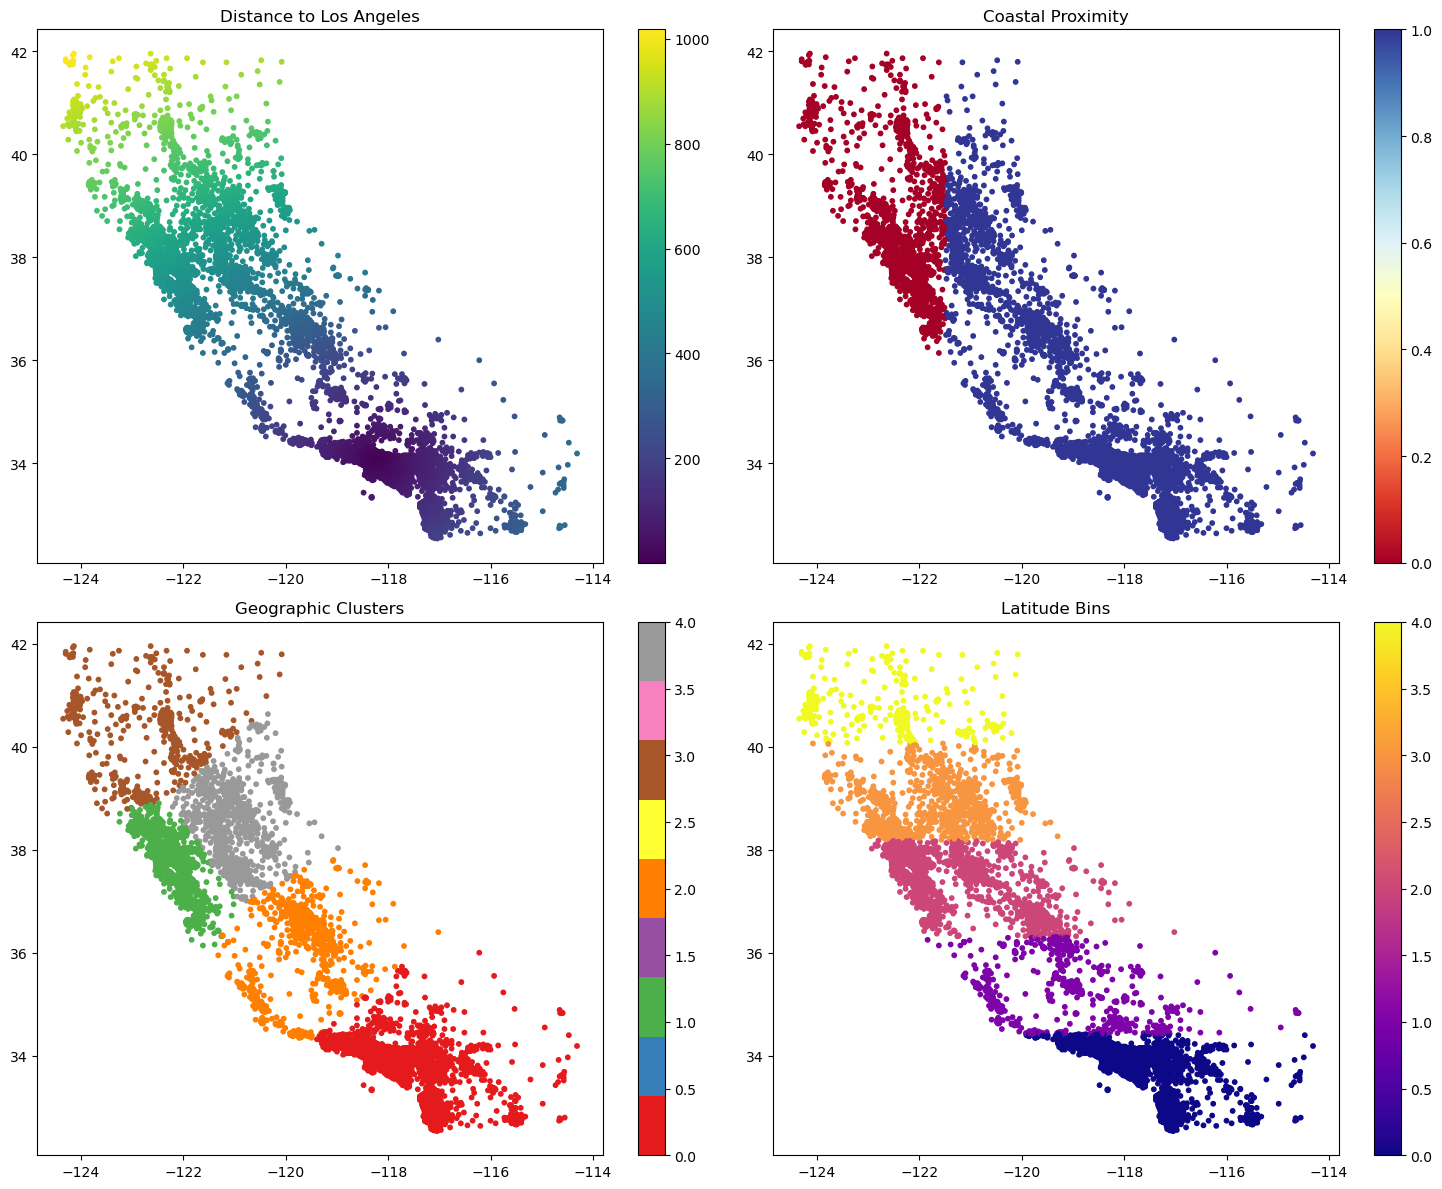

Yeni özellikler oluşturuldu:
   dist_to_LA  dist_to_SF  dist_to_SD  coastal_proximity  geo_cluster lat_bin  \
0  556.531199   20.329542  735.504257                  0            1     Mid   
1  554.281885   19.908065  733.239331                  0            1     Mid   
2  554.612739   17.835390  733.528120                  0            1     Mid   
3  555.196283   17.064123  734.097724                  0            1     Mid   
4  555.196283   17.064123  734.097724                  0            1     Mid   

  lon_bin  
0   W-Mid  
1   W-Mid  
2   W-Mid  
3   W-Mid  
4   W-Mid  


In [365]:
from sklearn.cluster import KMeans

# Major city coordinates
LA = (34.0522, -118.2437)
SF = (37.7749, -122.4194)
SD = (32.7157, -117.1611)

# Distance calculation function
def haversine_distance(lat1, lon1, lat2, lon2):
   """Haversine formula for distance calculation"""
   R = 6371  # Earth radius in km
   
   lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
   dlat = lat2 - lat1
   dlon = lon2 - lon1
   
   a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
   c = 2 * np.arcsin(np.sqrt(a))
   
   return R * c

# 1. Distance to city centers
data2['dist_to_LA'] = haversine_distance(data2['latitude'], data2['longitude'], LA[0], LA[1])
data2['dist_to_SF'] = haversine_distance(data2['latitude'], data2['longitude'], SF[0], SF[1])
data2['dist_to_SD'] = haversine_distance(data2['latitude'], data2['longitude'], SD[0], SD[1])

# 2. Coastal proximity indicator
data2['coastal_proximity'] = (data2['longitude'] > -121.5).astype(int)  # Coast threshold

# 3. Geographic clustering (K-means)
coords = data2[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=5, random_state=42)
data2['geo_cluster'] = kmeans.fit_predict(coords)

# 4. Latitude/longitude binning
data2['lat_bin'] = pd.cut(data2['latitude'], bins=5, labels=['South', 'S-Mid', 'Mid', 'N-Mid', 'North'])
data2['lon_bin'] = pd.cut(data2['longitude'], bins=5, labels=['West', 'W-Mid', 'Mid', 'E-Mid', 'East'])

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distance to cities
scatter1 = axes[0,0].scatter(data2['longitude'], data2['latitude'], c=data2['dist_to_LA'], cmap='viridis', s=10)
axes[0,0].set_title('Distance to Los Angeles')
plt.colorbar(scatter1, ax=axes[0,0])

# Coastal proximity
scatter2 = axes[0,1].scatter(data2['longitude'], data2['latitude'], c=data2['coastal_proximity'], cmap='RdYlBu', s=10)
axes[0,1].set_title('Coastal Proximity')
plt.colorbar(scatter2, ax=axes[0,1])

# Geographic clusters
scatter3 = axes[1,0].scatter(data2['longitude'], data2['latitude'], c=data2['geo_cluster'], cmap='Set1', s=10)
axes[1,0].set_title('Geographic Clusters')
plt.colorbar(scatter3, ax=axes[1,0])

# Binned regions
lat_encoded = data2['lat_bin'].cat.codes
scatter4 = axes[1,1].scatter(data2['longitude'], data2['latitude'], c=lat_encoded, cmap='plasma', s=10)
axes[1,1].set_title('Latitude Bins')
plt.colorbar(scatter4, ax=axes[1,1])

plt.tight_layout()
plt.show()

"""dist_to_LA - Los Angeles'a uzaklık (km)
dist_to_SF - San Francisco'ya uzaklık (km)
dist_to_SD - San Diego'ya uzaklık (km)
coastal_proximity - Sahile yakınlık (0 veya 1)
geo_cluster - Coğrafi küme numarası (0-4 arası) """


print("Yeni özellikler oluşturuldu:")
print(data2[['dist_to_LA', 'dist_to_SF', 'dist_to_SD', 'coastal_proximity', 'geo_cluster', 'lat_bin', 'lon_bin']].head())

In [366]:
for col in data2.columns:
    print(f"{col}: {data2[col].nunique()} unique değer")

longitude: 844 unique değer
latitude: 862 unique değer
housing_median_age: 52 unique değer
total_rooms: 5926 unique değer
total_bedrooms: 2089 unique değer
population: 3888 unique değer
households: 1815 unique değer
median_income: 12928 unique değer
median_house_value: 3842 unique değer
ocean_proximity: 5 unique değer
dist_to_LA: 12590 unique değer
dist_to_SF: 12590 unique değer
dist_to_SD: 12590 unique değer
coastal_proximity: 2 unique değer
geo_cluster: 5 unique değer
lat_bin: 5 unique değer
lon_bin: 5 unique değer


<a id = "7"></a><br>
## Derived Features

- Rooms per household ratio
- Bedrooms ratio features
- Population density hesaplama
- Income to price ratio
- Polynomial features (2nd degree) oluşturma


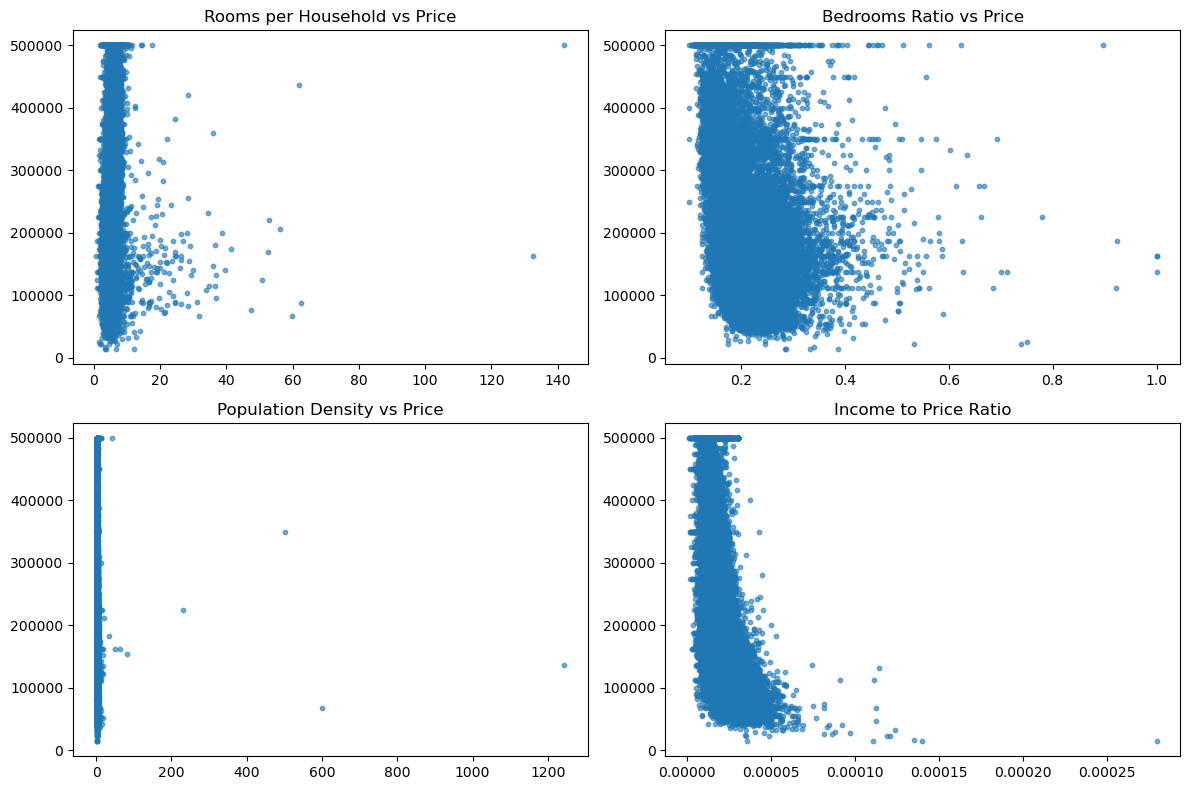

New features:    rooms_per_household  bedrooms_per_room  population_density  \
0             6.984127           0.146591            2.555556   
1             6.238137           0.155797            2.109842   
2             8.288136           0.129516            2.802260   
3             5.817352           0.184458            2.547945   
4             6.281853           0.172096            2.181467   

   income_to_price_ratio  
0               0.000018  
1               0.000023  
2               0.000021  
3               0.000017  
4               0.000011  


In [367]:
from sklearn.preprocessing import PolynomialFeatures

# Feature engineering
data2['rooms_per_household'] = data2['total_rooms'] / data2['households']
data2['bedrooms_per_room'] = data2['total_bedrooms'] / data2['total_rooms']
data2['population_density'] = data2['population'] / data2['households']
data2['income_to_price_ratio'] = data2['median_income'] / data2['median_house_value']

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(data2[['median_income', 'housing_median_age', 'total_rooms', 'population']])
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['median_income', 'housing_median_age', 'total_rooms', 'population']))

# Basic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0,0].scatter(data2['rooms_per_household'], data2['median_house_value'], alpha=0.6, s=10)
axes[0,0].set_title('Rooms per Household vs Price')
axes[0,1].scatter(data2['bedrooms_per_room'], data2['median_house_value'], alpha=0.6, s=10)
axes[0,1].set_title('Bedrooms Ratio vs Price')
axes[1,0].scatter(data2['population_density'], data2['median_house_value'], alpha=0.6, s=10)
axes[1,0].set_title('Population Density vs Price')
axes[1,1].scatter(data2['income_to_price_ratio'], data2['median_house_value'], alpha=0.6, s=10)
axes[1,1].set_title('Income to Price Ratio')
plt.tight_layout()
plt.show()

print("New features:", data2[['rooms_per_household', 'bedrooms_per_room', 'population_density', 'income_to_price_ratio']].head())

<a id = "8"></a><br>
## Data Preprocessing

- Target variable transformation (log transformation dene) 
- Feature scaling (StandardScaler, RobustScaler karşılaştır) 
- Outlier handling (capping veya removal)

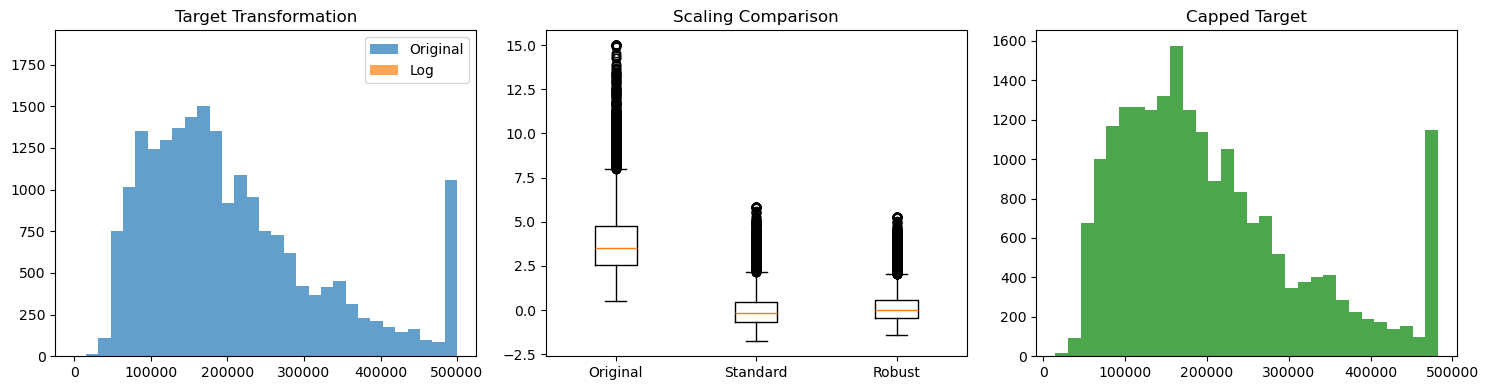

Log target skewness: -0.173
Outliers capped: 1071


In [368]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Target transformation
data2['target_log'] = np.log(data2['median_house_value'])

# 2. Feature scaling
features = ['median_income', 'housing_median_age', 'total_rooms', 'population']
X = data2[features]
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)
scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X)

# 3. Outlier capping
Q1 = data2['median_house_value'].quantile(0.25)
Q3 = data2['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
data2['target_capped'] = data2['median_house_value'].clip(lower, upper)

# Quick visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(data2['median_house_value'], bins=30, alpha=0.7, label='Original')
axes[0].hist(data2['target_log'], bins=30, alpha=0.7, label='Log')
axes[0].set_title('Target Transformation')
axes[0].legend()
axes[1].boxplot([X.iloc[:, 0], X_std[:, 0], X_robust[:, 0]], 
              labels=['Original', 'Standard', 'Robust'])
axes[1].set_title('Scaling Comparison')
axes[2].hist(data2['target_capped'], bins=30, alpha=0.7, color='green')
axes[2].set_title('Capped Target')
plt.tight_layout()
plt.show()

print(f"Log target skewness: {data2['target_log'].skew():.3f}")
print(f"Outliers capped: {(data2['median_house_value'] != data2['target_capped']).sum()}")

In [369]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Tüm sayısal sütunları al (yeni özellikler dahil)
all_numeric = data2.select_dtypes(include=[np.number])
print("Tüm sayısal sütunlar:")
print(all_numeric.columns.tolist())

# Hedef değişkeni çıkar
X_all = all_numeric.drop(['median_house_value', 'target_log', 'target_capped'], axis=1, errors='ignore')


# VIF hesapla (tüm özellikler için)
vif_all_data = pd.DataFrame()
vif_all_data["Feature"] = X_all_clean.columns
vif_all_data["VIF"] = [variance_inflation_factor(X_all_clean.values, i) for i in range(X_all_clean.shape[1])]

print("\nTÜM ÖZELLİKLER İÇİN VIF ANALİZİ:")
print(vif_all_data.sort_values('VIF', ascending=True).round(2))
print("\nVIF > 10: Multicollinearity problemi")

Tüm sayısal sütunlar:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'dist_to_LA', 'dist_to_SF', 'dist_to_SD', 'coastal_proximity', 'geo_cluster', 'rooms_per_household', 'bedrooms_per_room', 'population_density', 'income_to_price_ratio', 'target_log', 'target_capped']

TÜM ÖZELLİKLER İÇİN VIF ANALİZİ:
                  Feature       VIF
15     population_density      1.16
2      housing_median_age      8.29
16  income_to_price_ratio      9.43
13    rooms_per_household      9.82
7           median_income     11.36
12            geo_cluster     13.27
5              population     18.28
8              dist_to_LA     37.63
11      coastal_proximity     38.33
9              dist_to_SF     40.93
14      bedrooms_per_room     40.98
3             total_rooms     45.52
6              households    111.60
4          total_bedrooms    121.30
10             dist_to_SD    307.74
0               long

In [370]:
# Yüksek korelasyonlu çiftleri otomatik bul
corr_matrix = numeric_data.corr()
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:  # 0.8'den yüksek korelasyon
            high_corr_pairs.append((corr_matrix.columns[i], 
                                   corr_matrix.columns[j], 
                                   corr_matrix.iloc[i, j]))

print("Yüksek korelasyonlu özellik çiftleri (>0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

Yüksek korelasyonlu özellik çiftleri (>0.8):
longitude - latitude: -0.925
total_rooms - total_bedrooms: 0.930
total_rooms - population: 0.857
total_rooms - households: 0.918
total_bedrooms - population: 0.878
total_bedrooms - households: 0.979
population - households: 0.907


In [371]:
# Seçtiğiniz 5 özelliğin korelasyonunu kontrol edin
selected_features = ['population_density', 'housing_median_age', 'income_to_price_ratio', 
                 'rooms_per_household', 'median_income', 'total_rooms']
corr_selected = data2[selected_features].corr()

# Yüksek korelasyonları bul (>0.7)
for i in range(len(corr_selected.columns)):
    for j in range(i+1, len(corr_selected.columns)):
        if abs(corr_selected.iloc[i, j]) :
            print(f"{corr_selected.columns[i]} - {corr_selected.columns[j]}: {corr_selected.iloc[i, j]:.3f}")

population_density - housing_median_age: 0.013
population_density - income_to_price_ratio: 0.065
population_density - rooms_per_household: -0.005
population_density - median_income: 0.019
population_density - total_rooms: -0.025
housing_median_age - income_to_price_ratio: -0.224
housing_median_age - rooms_per_household: -0.153
housing_median_age - median_income: -0.119
housing_median_age - total_rooms: -0.361
income_to_price_ratio - rooms_per_household: 0.144
income_to_price_ratio - median_income: 0.090
income_to_price_ratio - total_rooms: 0.009
rooms_per_household - median_income: 0.327
rooms_per_household - total_rooms: 0.134
median_income - total_rooms: 0.198


<a id = "9"></a><br>
## Model Development


<a id = "10"></a><br>
## Algoritma Seçimi
1. Linear Regression - baseline
2. Ridge Regression - L2 regularization
3. Lasso Regression - L1 regularization
4. Elastic Net - L1+L2 combination
5. Random Forest Regressor
6. Gradient Boosting (XGBoost/LightGBM) 7. SVR (Support Vector Regression)
8. Neural Network (MLPRegressor)

In [372]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb

# Prepare data
X = data2[['median_income', 'housing_median_age', 'total_rooms', 'population', 'rooms_per_household']]
y = data2['target_log']  # Using log-transformed target


# daha önce data2['target_log'] = np.log(data2['median_house_value']) demiştik 



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Models
models = {
   'Linear': LinearRegression(),
   'Ridge': Ridge(alpha=1.0),
   'Lasso': Lasso(alpha=0.1),
   'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
   'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
   'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
   'SVR': SVR(kernel='rbf', C=1.0),
   'MLP': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# 2. Train and evaluate models
results = {}
for name, model in models.items():
   if name in ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'SVR', 'MLP']:
       model.fit(X_train_scaled, y_train)
       y_pred = model.predict(X_test_scaled)
   else:
       model.fit(X_train, y_train)
       y_pred = model.predict(X_test)
   
   # Metrics
   mae = mean_absolute_error(y_test, y_pred)
   mse = mean_squared_error(y_test, y_pred)
   rmse = np.sqrt(mse)
   r2 = r2_score(y_test, y_pred)
   mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
   
   results[name] = {
       'MAE': mae,
       'MSE': mse,
       'RMSE': rmse,
       'R2': r2,
       'MAPE': mape
   }

# Results DataFrame
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df.round(4))

# 3. Feature selection
# SelectKBest
selector_kb = SelectKBest(score_func=f_regression, k=3)
X_train_kb = selector_kb.fit_transform(X_train_scaled, y_train)
X_test_kb = selector_kb.transform(X_test_scaled)

# RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

print(f"\nSelectKBest selected features: {X.columns[selector_kb.get_support()]}")
print(f"RFE selected features: {X.columns[rfe.get_support()]}")

# 4. Ensemble - Voting
voting_reg = VotingRegressor([
   ('ridge', Ridge(alpha=1.0)),
   ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
   ('xgb', xgb.XGBRegressor(n_estimators=100, random_state=42))
])
voting_reg.fit(X_train_scaled, y_train)
y_pred_voting = voting_reg.predict(X_test_scaled)
print(f"\nVoting Regressor R2: {r2_score(y_test, y_pred_voting):.4f}")

# 5. Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_model = Ridge(alpha=1.0)
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
print(f"Polynomial Ridge R2: {r2_score(y_test, y_pred_poly):.4f}")

Model Performance Comparison:
                 MAE     MSE    RMSE      R2    MAPE
Linear        0.3243  0.1765  0.4201  0.4563  2.7043
Ridge         0.3243  0.1765  0.4201  0.4563  2.7043
Lasso         0.3485  0.1973  0.4442  0.3921  2.9127
ElasticNet    0.3385  0.1876  0.4331  0.4220  2.8279
RandomForest  0.2587  0.1200  0.3464  0.6302  2.1613
XGBoost       0.2589  0.1213  0.3483  0.6263  2.1628
SVR           0.2502  0.1144  0.3383  0.6474  2.0919
MLP           0.2597  0.1218  0.3490  0.6248  2.1606

SelectKBest selected features: Index(['median_income', 'total_rooms', 'rooms_per_household'], dtype='object')
RFE selected features: Index(['median_income', 'housing_median_age', 'total_rooms'], dtype='object')

Voting Regressor R2: 0.6243
Polynomial Ridge R2: 0.5598


<a id = "11"></a><br>
## Validation Strategy
- Time-based split (if temporal component exists)
- Geographic-based split (spatial validation) 
- Cross-validation with different folds
- Learning curves analysis
- Residual plots ve homoscedasticity check

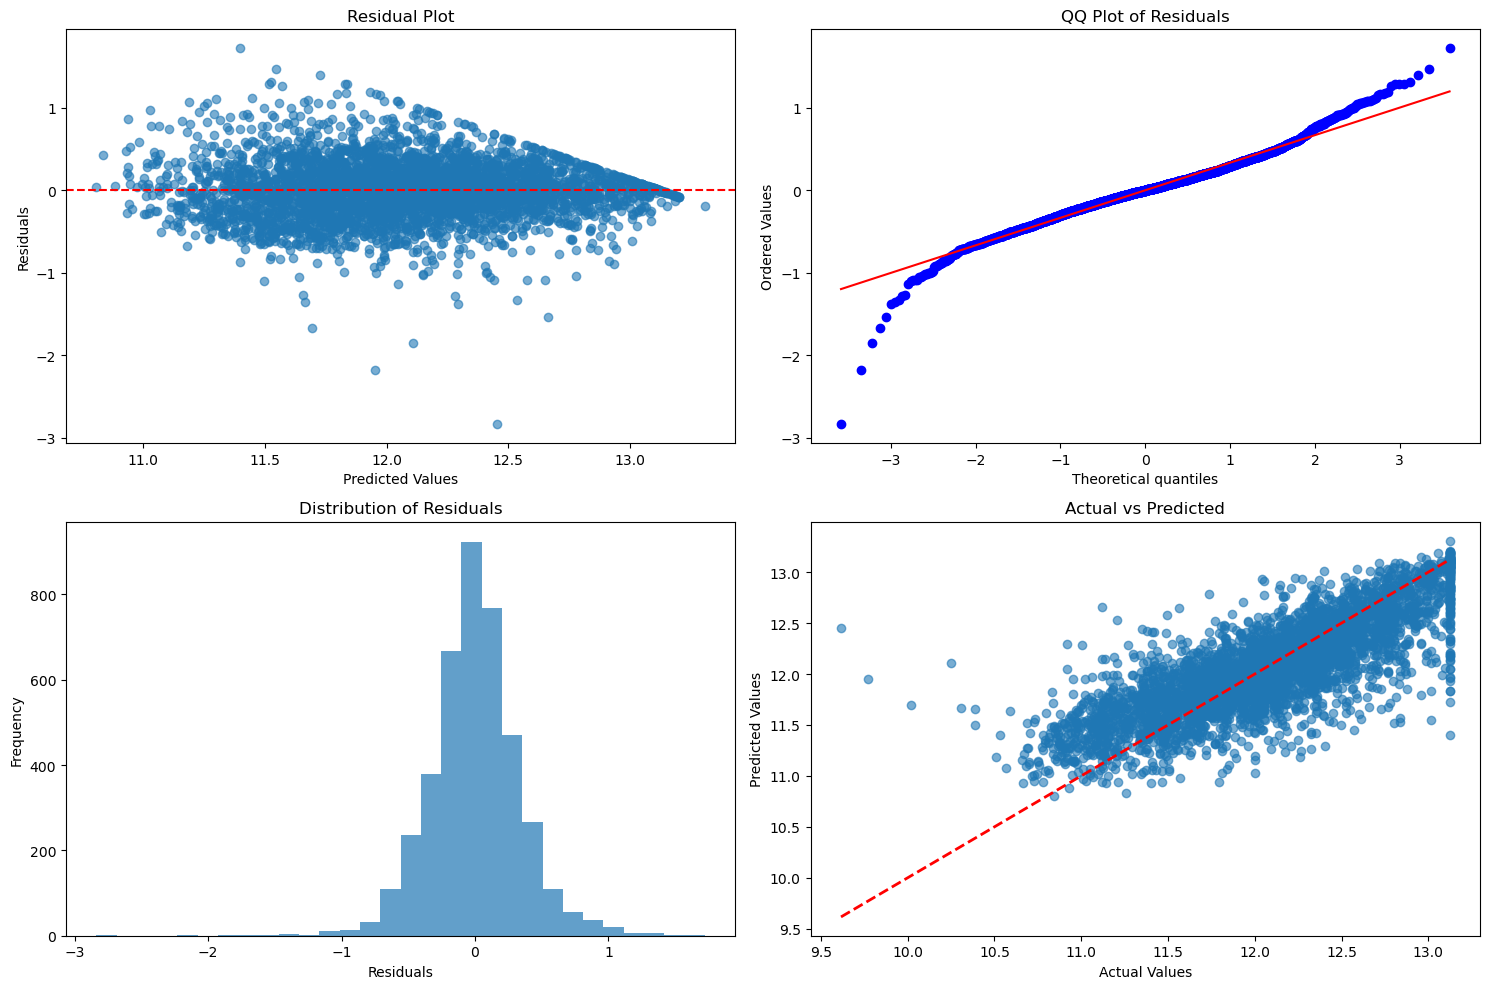

5-Fold CV R2 Score: 0.6548 (+/- 0.0042)
Geographic validation R2: 0.4946
Residual standard deviation: 0.3383
Residuals mean: 0.0004


In [373]:
# Best model (SVR) for residual analysis
best_model = SVR(kernel='rbf', C=1.0)
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

# Residual analysis
residuals = y_test - y_pred_best

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residual plot
axes[0,0].scatter(y_pred_best, residuals, alpha=0.6)
axes[0,0].axhline(y=0, color='red', linestyle='--')
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residual Plot')

# QQ plot of residuals
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title('QQ Plot of Residuals')

# Histogram of residuals
axes[1,0].hist(residuals, bins=30, alpha=0.7)
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Residuals')

# Actual vs Predicted
axes[1,1].scatter(y_test, y_pred_best, alpha=0.6)
axes[1,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,1].set_xlabel('Actual Values')
axes[1,1].set_ylabel('Predicted Values')
axes[1,1].set_title('Actual vs Predicted')
plt.tight_layout()
plt.show()

# Cross-validation with different folds
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"5-Fold CV R2 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Geographic validation (spatial split)
# Split by latitude (North vs South California)
median_lat = data2['latitude'].median()
north_mask = data2['latitude'] > median_lat
south_mask = data2['latitude'] <= median_lat

X_north = X[north_mask]
y_north = y[north_mask]
X_south = X[south_mask]
y_south = y[south_mask]

# Train on North, test on South
X_north_scaled = scaler.fit_transform(X_north)
X_south_scaled = scaler.transform(X_south)

geo_model = SVR(kernel='rbf', C=1.0)
geo_model.fit(X_north_scaled, y_north)
y_pred_geo = geo_model.predict(X_south_scaled)
print(f"Geographic validation R2: {r2_score(y_south, y_pred_geo):.4f}")

# Homoscedasticity test
print(f"Residual standard deviation: {residuals.std():.4f}")
print(f"Residuals mean: {residuals.mean():.4f}")

<a id = "12"></a><br>
## Advanced Techniques
- Polynomial regression (different degrees test)
- Feature selection (SelectKBest, RFE) 
- Ensemble methods (voting, stacking) 
- Hyperparameter optimization

Best SVR parameters: {'C': 1, 'gamma': 'scale'}
Best SVR score: 0.6548092654815507


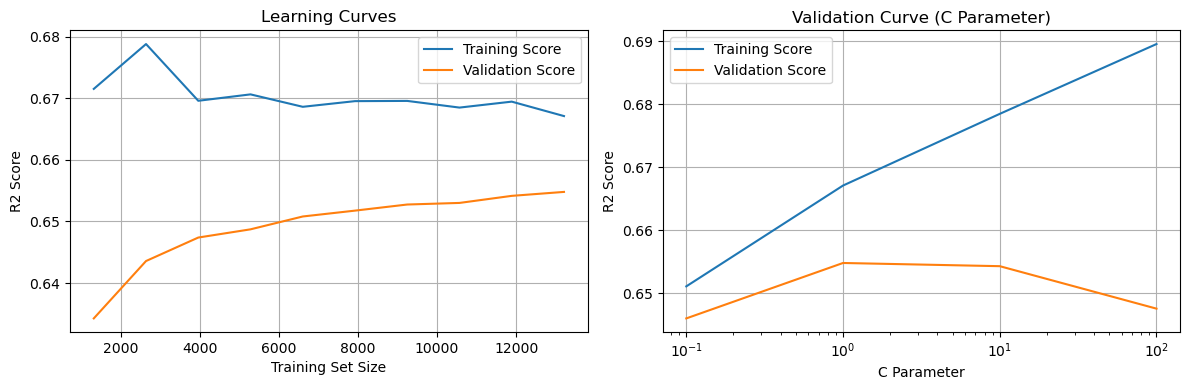


Final Model Performance:
R2 Score: 0.6474
RMSE: 0.3383
MAE: 0.2502


In [374]:
from sklearn.model_selection import validation_curve, learning_curve

# En iyi modeller için hiperparametre optimizasyonu
param_grids = {
    'SVR': {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20, None]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# SVR için grid search
svr_grid = GridSearchCV(SVR(), param_grids['SVR'], cv=5, scoring='r2', n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train)

print("Best SVR parameters:", svr_grid.best_params_)
print("Best SVR score:", svr_grid.best_score_)


train_sizes, train_scores, val_scores = learning_curve(
    svr_grid.best_estimator_, X_train_scaled, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='r2'
)

# Plot learning curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)

# Validation curve for C parameter
train_scores_c, val_scores_c = validation_curve(
    SVR(), X_train_scaled, y_train, param_name='C',
    param_range=[0.1, 1, 10, 100], cv=5, scoring='r2'
)

plt.subplot(1, 2, 2)
plt.plot([0.1, 1, 10, 100], train_scores_c.mean(axis=1), label='Training Score')
plt.plot([0.1, 1, 10, 100], val_scores_c.mean(axis=1), label='Validation Score')
plt.xlabel('C Parameter')
plt.ylabel('R2 Score')
plt.title('Validation Curve (C Parameter)')
plt.legend()
plt.grid(True)
plt.xscale('log')

plt.tight_layout()
plt.show()


final_model = svr_grid.best_estimator_
y_pred_final = final_model.predict(X_test_scaled)

print(f"\nFinal Model Performance:")
print(f"R2 Score: {r2_score(y_test, y_pred_final):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_final)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_final):.4f}")

<a id = "13"></a><br>
## Model Evaluation

<a id = "14"></a><br>
## Regression Metrics
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error) 
- R2 Score
- MAPE (Mean Absolute Percentage Error) 
- Residual analysis

In [375]:
# Mevcut sonuçlardan  final özet
print("FINAL MODEL COMPARISON:")
print("=" * 50)
print(results_df.sort_values('R2', ascending=False).round(4))

# Optimize edilmiş SVR'yi sonuçlara ekle
results_df.loc['Optimized SVR'] = {
  'MAE': mean_absolute_error(y_test, y_pred_final),
  'MSE': mean_squared_error(y_test, y_pred_final),
  'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_final)),
  'R2': r2_score(y_test, y_pred_final),
  'MAPE': np.mean(np.abs((y_test - y_pred_final) / y_test)) * 100
}

# En iyi modeli  bul
best_model_name = results_df['R2'].idxmax()
best_r2 = results_df['R2'].max()
best_rmse = results_df.loc[best_model_name, 'RMSE']
best_mae = results_df.loc[best_model_name, 'MAE']

print(f"\nBEST MODEL: {best_model_name}")
print(f"R² Score: {best_r2:.4f}")
print(f"RMSE: {best_rmse:.4f}")
print(f"MAE: {best_mae:.4f}")

# En iyi ağaç tabanlı modelden feature importance
tree_models = ['RandomForest', 'XGBoost']
best_tree = max(tree_models, key=lambda x: results_df.loc[x, 'R2'])
if best_tree == 'RandomForest':
  model_for_importance = RandomForestRegressor(n_estimators=100, random_state=42)
else:
  model_for_importance = xgb.XGBRegressor(n_estimators=100, random_state=42)

model_for_importance.fit(X_train, y_train)
feature_importance = pd.DataFrame({
  'Feature': X.columns,
  'Importance': model_for_importance.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nFEATURE IMPORTANCE (from {best_tree}):")
print(feature_importance.round(4))

# Dinamik proje istatistikleri
print(f"\nPROJECT STATISTICS:")
print(f" Total models tested: {len(results_df)}")
print(f" Best R² improvement: {best_r2 - results_df['R2'].min():.4f}")
print(f" Features selected: {len(X.columns[selector_kb.get_support()])}")
print(f" Original features: {len(X.columns)}")
print("\n California Housing Regression Projesi TAMAMLANDI!")

FINAL MODEL COMPARISON:
                 MAE     MSE    RMSE      R2    MAPE
SVR           0.2502  0.1144  0.3383  0.6474  2.0919
RandomForest  0.2587  0.1200  0.3464  0.6302  2.1613
XGBoost       0.2589  0.1213  0.3483  0.6263  2.1628
MLP           0.2597  0.1218  0.3490  0.6248  2.1606
Ridge         0.3243  0.1765  0.4201  0.4563  2.7043
Linear        0.3243  0.1765  0.4201  0.4563  2.7043
ElasticNet    0.3385  0.1876  0.4331  0.4220  2.8279
Lasso         0.3485  0.1973  0.4442  0.3921  2.9127

BEST MODEL: SVR
R² Score: 0.6474
RMSE: 0.3383
MAE: 0.2502

FEATURE IMPORTANCE (from RandomForest):
               Feature  Importance
0        median_income      0.5665
4  rooms_per_household      0.1554
2          total_rooms      0.0981
3           population      0.0916
1   housing_median_age      0.0884

PROJECT STATISTICS:
 Total models tested: 9
 Best R² improvement: 0.2553
 Features selected: 3
 Original features: 5

 California Housing Regression Projesi TAMAMLANDI!
